普通にやってもできなかったのでocrで試してみることにする

In [1]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libdatrie1 libgif7 libjbig0 liblept5 libopenjp2-7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpixman-1-0
  libtesseract4 libthai-data libthai0 libtiff5 libwebp6 libxcb-render0
  libxcb-shm0 tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  fontconfig libcairo2 libdatrie1 libgif7 libjbig0 liblept5 libopenjp2-7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpixman-1-0
  libtesseract4 libthai-data libthai0 libtiff5 libwebp6 libxcb-render0
  libxcb-shm0 tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 21 newly installed, 0 to remove and 5 not upgraded.
Need to get 8,799 kB of archives.
After this operation, 27.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fontconfig amd64 2.12.6-0ubuntu2 [169 kB]

In [2]:
!curl -L https://github.com/tesseract-ocr/tessdata/raw/master/jpn.traineddata > jpn.traineddata
!cp jpn.traineddata /usr/share/tesseract-ocr/tessdata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0   1098      0 --:--:-- --:--:-- --:--:--  1098
100 34.0M  100 34.0M    0     0  20.1M      0  0:00:01  0:00:01 --:--:-- 33.8M


In [0]:
from PIL import Image
import sys
import pyocr
import pyocr.builders

In [4]:
#OCRが使用可能かをチェック
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("OCR tool is not found")
    sys.exit(1)

#OCRツール名を表示
tool = tools[0]
print("OCR tool is '%s'" % (tool.get_name()))

OCR tool is 'Tesseract (sh)'


In [5]:
#OCR対応言語を表示
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[0]
print("Will use lang '%s'" % (lang))

Available languages: osd, eng
Will use lang 'osd'


In [6]:
#OCRを行う画像を読み込み
from google.colab import files
f = files.upload()
#読み込んだ画像のファイル名
filename = list(f)[0]

Saving 2048.png to 2048.png


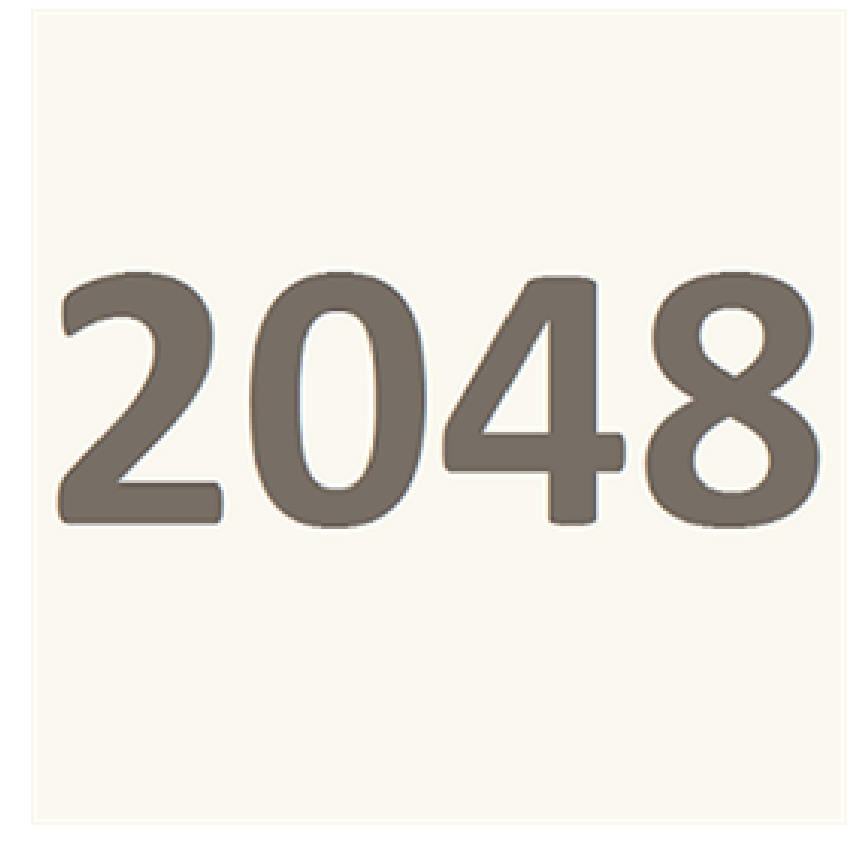

In [7]:
#読み込んだ画像を表示してみる
 %matplotlib inline
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img)

In [8]:
 #読み込んだ画像をOCRでテキスト抽出してみる。
txt = tool.image_to_string(
    Image.open(filename),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print(txt)

2048


できたできた！！じゃあこれを数独に当てはめてみる！

predict answer:  3


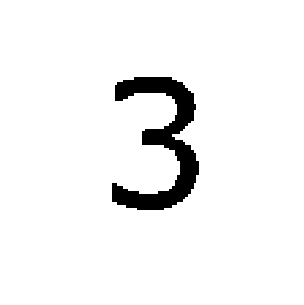

In [9]:
filenameex = "img13a.png"

img = cv2.imread(filenameex)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(img)

txt = tool.image_to_string(
    Image.open(filenameex),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print("predict answer: ", txt)

predict answer:  1


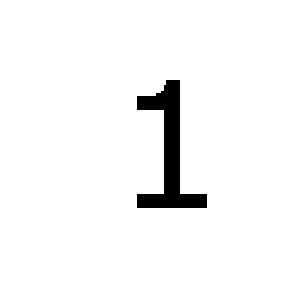

In [12]:
filenameex = "img25a.png"

img = cv2.imread(filenameex)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(img)

txt = tool.image_to_string(
    Image.open(filenameex),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print("predict answer: ", txt)

predict answer:  8


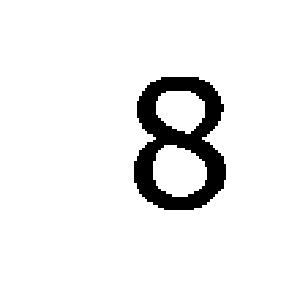

In [11]:
filenameex = "img17a.png"

img = cv2.imread(filenameex)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(img)

txt = tool.image_to_string(
    Image.open(filenameex),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print("predict answer: ", txt)